# Algotrading

## Luís Filipe Martins Loureiro

#### Março, 2023
#### Exercício 1

In [1]:
# Importando as bibliotecas

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from scipy import stats
import yahoofinancials as yf
from IPython import display

A empresa escolhida foi o Méliuz, considerada a primeira startup a ser listada na B3. A expectativa é de uma ação bastante descontada, dado a conjuntura de SELIC alta, algo que impacta mais empresas cuja maior parte do valor está na perpetuidade.

In [2]:

ticker = 'CASH3.SA'

start_date = '2022-08-23'
end_date =  '2023-02-23'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')

In [13]:
# Ajustando o DataFrame para focar nas colunas de interesse

# Ler os dados do JSON
cash3_raw = pd.DataFrame(data[ticker]['prices']).dropna()
# Converter a data para o tipo correto datetime
cash3_raw['formatted_date'] = pd.to_datetime(cash3_raw['formatted_date'])
# Indica a data como o índice de cada linha
cash3_raw = cash3_raw.set_index('formatted_date')
cash3 = cash3_raw.iloc[:,1:-1]
cash3.head(10)

,high,low,open,close,volume
formatted_date,,,,,
2022-08-23,1.32,1.19,1.19,1.29,45616300
2022-08-24,1.37,1.28,1.29,1.32,48894100
2022-08-25,1.40,1.33,1.35,1.36,41879900
2022-08-26,1.39,1.31,1.36,1.33,27783300
2022-08-29,1.37,1.31,1.33,1.31,30630400
2022-08-30,1.35,1.25,1.35,1.26,34570200
2022-08-31,1.32,1.25,1.28,1.31,42062100
2022-09-01,1.37,1.28,1.31,1.35,37673600
2022-09-02,1.38,1.31,1.36,1.32,40040400


## Simulando Estratégia de Trade

- Comprar quando estiver caindo 1% em relação ao início da simulação
- Sair da posição quando estiver ganhando ou perdendo 2% do preço de entrada
- Entrar novamente quando o preço cair 1% do último preço de venda

Carteira - CASH3 - Méliuz Aug/22 a Fev/23


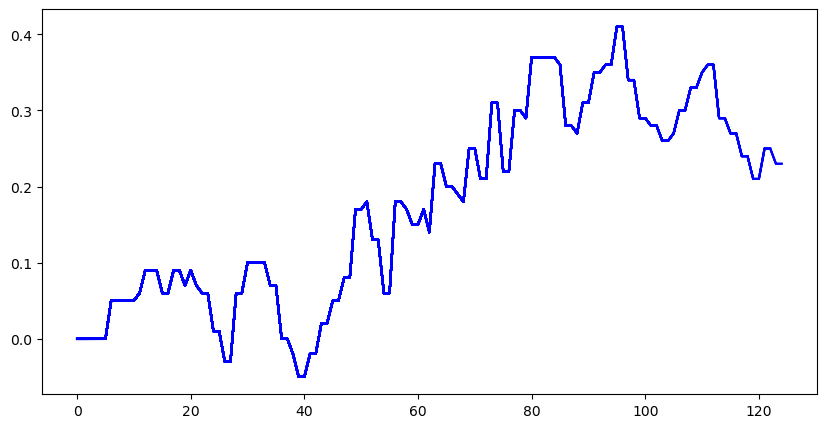

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));

cash = 0 # indica quanto dinheiro tem no bolso
position = 0 # indica a posição atual. 0 é zerado
result = [] # lista para montar o gráfico
buy_price = 0
sell_price = 0
fim = 0
first_price = cash3.close[0] #primeiro valor, início da simulação
for price in cash3.close:   
    # Critério de compra
    if position == 0 and ((price <=  first_price * 0.99) or (price <= sell_price * 0.99)):
        cash -= 1 * price # Fluxo de caixa negativo
        position = 1 # Indica que está comprado em 1
        buy_price = price       
        
    # Critério de Venda:
    if position == 1 and ((price >= buy_price * 1.02) or (price < buy_price * 0.98)):        
        cash += 1 * price
        position = 0
        sell_price = price 

    result.append(cash + 1 * price * position) # Mark To Market!    
    # Fazendo o plot a cada iteração:
    ax.plot(result, color='blue')    
    display.clear_output(wait=True)
    display.display(fig)    
   
ax.plot(result, color='blue');
display.clear_output(wait=True)
print("Carteira - CASH3 - Méliuz Aug/22 a Fev/23")

In [33]:
cash3.close.head()

formatted_date
2022-08-23    1.29
2022-08-24    1.32
2022-08-25    1.36
2022-08-26    1.33
2022-08-29    1.31
Name: close, dtype: float64

In [32]:
print("EOF")

EOF
